#<a id="Few_examples_of_how_to_use_SPIKE"> Few examples of how to use SPIKE</a>

* simple import of native dataset.

* simple FID

* FFT with zerofilling

* urQRd

You have first to execute the first two cells, then you can execute independently any of the example cells.   
We begin first with simple import then we show how to make more elaborated commands involving data processing algorithms such as  urQRd.

In [1]:
%matplotlib inline

In [2]:
cd ../.. 

/Users/chiron/bitbuck


In [3]:
from spike.File.Apex import Import_1D
import numpy as np                  # pour faire des calculs
import matplotlib.pyplot as plt     # pour afficher les données brutes
from spike.FTICR import FTICRData


          SPIKE
    Version     : 0.6.4
    Date        : 12-03-2015
Importing plugin << bcorr >>
Importing plugin << fastclean >>
Importing plugin << Peaks >>
Importing plugin << rem_ridge >>
Importing plugin << sg >>
Importing plugin << test >>
Importing plugin << urQRd >>


##<a class="links" id="Few_examples_of_how_to_use_SPIKE_Import_from_Apex"> Import from Apex</a>

Simple import from Apex format

In [4]:
f = Import_1D("DATA_test/angio_ms_000005.d")
f.report()

['DATA_test/angio_ms_000005.d/Apex2_LC_autoexclusion_test2.m/apexAcquisition.method'] 1


'Dim 1\nAxis F1 : FT-ICR axis at 1000.000000 kHz,  524288 real points,  from mz = 1500.000   to m/z =  144.365  R max (M=400) = 189221'

##<a class="links" id="Few_examples_of_how_to_use_SPIKE_Show_the_FID"> Show the FID</a>

['DATA_test/angio_ms_000005.d/Apex2_LC_autoexclusion_test2.m/apexAcquisition.method'] 1


Dim 1
Axis F1 : FT-ICR axis at 1000.000000 kHz,  524288 real points,  from mz = 1500.000   to m/z =  144.365  R max (M=400) = 189221

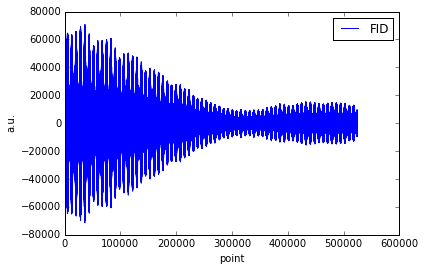

In [5]:
f = Import_1D("DATA_test/angio_ms_000005.d")
f.display(label = "FID")

##<a class="links" id="Few_examples_of_how_to_use_SPIKE_Show_the_half_truncated_FID_and_full_FID"> Show the half truncated FID and full FID</a>

['DATA_test/angio_ms_000005.d/Apex2_LC_autoexclusion_test2.m/apexAcquisition.method'] 1


Dim 1
Axis F1 : FT-ICR axis at 1000.000000 kHz,  262144 real points,  from mz = 1500.000   to m/z =  144.365  R max (M=400) = 94611

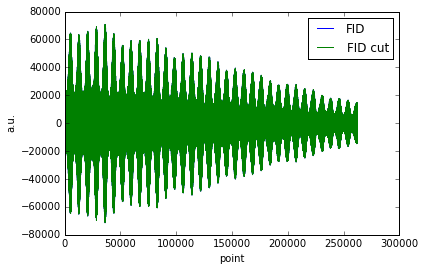

In [6]:
f = Import_1D("DATA_test/angio_ms_000005.d")
f.chsize(len(f.buffer)/2)
ff = f.copy()
ff.buffer = ff.buffer[:len(f.buffer)/2]/2
f.display(label = "FID")
f.display(label = "FID cut", new_fig = False)

##<a class="links" id="Few_examples_of_how_to_use_SPIKE_Doing_FFT_with_zerofilling"> Doing FFT with zerofilling</a>

Classical FFT with apodisation and zerofilling.

['DATA_test/angio_ms_000005.d/Apex2_LC_autoexclusion_test2.m/apexAcquisition.method'] 1


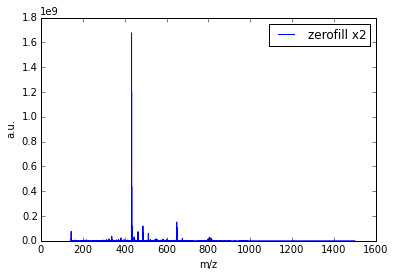

Dim 1
Axis F1 : FT-ICR axis at 1000.000000 kHz,  524288 real points,  from mz = 1500.000   to m/z =  144.365  R max (M=400) = 189221

In [7]:
f = Import_1D("DATA_test/angio_ms_000005.d")
f.report()
f.currentunit = 'm/z'
f.apod_sin(maxi = 0.5).chsize(f.buffer.size*2).rfft().modulus().display(label = "zerofill x2", show = True)

##<a class="links" id="Few_examples_of_how_to_use_SPIKE_FFT_with_zerofilling,_processing_cutting_the_pipes."> FFT with zerofilling, processing cutting the pipes.</a>

Here instead of writing a single long command with pipelines, the command is cut in many chunks.
This can be used for performing intermediate operations not present in NPKv2.

['DATA_test/angio_ms_000005.d/Apex2_LC_autoexclusion_test2.m/apexAcquisition.method'] 1


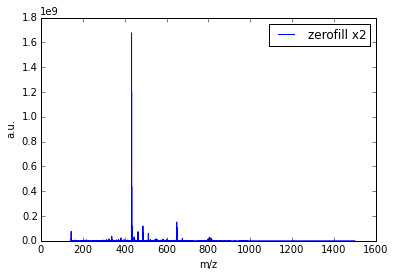

Dim 1
Axis F1 : FT-ICR axis at 1000.000000 kHz,  524288 real points,  from mz = 1500.000   to m/z =  144.365  R max (M=400) = 189221

In [8]:
f = Import_1D("DATA_test/angio_ms_000005.d")
f.currentunit = 'm/z'
f.apod_sin(maxi = 0.5)
f.chsize(f.buffer.size*2).rfft()
f.modulus().display(label = "zerofill x2", show = True)

##<a class="links" id="Few_examples_of_how_to_use_SPIKE_Using_urQRd"> Using urQRd</a>

Example of how to use urQRd for denoising a spectrum. As a rule of thumb, the rank must be few times the number of expected frequencies.

['DATA_test/angio_ms_000005.d/Apex2_LC_autoexclusion_test2.m/apexAcquisition.method'] 1


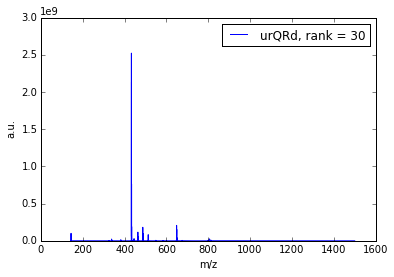

Dim 1
Axis F1 : FT-ICR axis at 1000.000000 kHz,  262144 real points,  from mz = 1500.000   to m/z =  144.365  R max (M=400) = 94611

In [9]:
f = Import_1D("DATA_test/angio_ms_000005.d")
f.currentunit = 'm/z'
rank = 30
f.urqrd(k = rank).rfft().modulus().display(label = "urQRd, rank = {}".format(rank), show = True)